In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from Engine.Engine import Value, Neuron, Layer, Visualizer, MLP
from Engine.MLUtils import printPurple

from keras.datasets import mnist

Value(v3: Data: 2, Grad: 1)


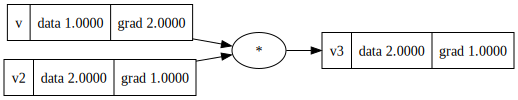

In [2]:
# testing imports
v = Value(1) ; v.label = "v"
v2 = Value(2) ;  v2.label = "v2"
v3 = v * v2 ; v3.label = "v3"

v3.backProp()

print(v3)
Visualizer(v3)()

In [3]:
# import Data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


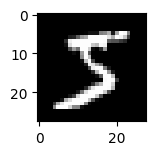

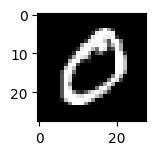

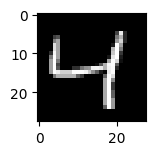

(28, 28)

In [4]:
# See if the data is usable
for i in range(3):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

train_X[0].shape

In [5]:
from Engine.MultiLayerPerceptron import train

print("def train(model, xs, ys, epochs, iterPerEpoch, lr):")

def reshapeImage(image):
    return np.reshape(image, (image.shape[0] * image.shape[1], 1))

def flattenData(inputImages):
    outputImages = []
    """Enter Input Images as an array full of images"""
    for i in range(inputImages.shape[0]):
        outputImages.append(reshapeImage(inputImages[i]))
        
    return np.array(outputImages)
    
    
images = flattenData(train_X)
print(images.shape)

def train(model, xs, ys, epochs, iterPerEpoch, lr):
(60000, 784, 1)


In [7]:
trainImages = flattenData(train_X)
trainLabels = train_y

model1 = MLP(784, [128, 64, 10])


In [8]:
def calcLoss(modelPred, Actual):
    predArray = np.zeros(10)
    predArray[Actual] = 1
    loss = 0
    
    for i, out in enumerate(modelPred):
        loss += (out.value - predArray[i])**2
    
    return loss
        

In [13]:
def pred(model, image):
    highestPred = -1
    prediction = -1
    for i, out in enumerate(model(image)):
        if out.value > highestPred:
            highestPred = out.value
            prediction = i
        
    if highestPred == -1:
        return "Error"
    else:
        return prediction

prediction = model1(trainImages[1])
actual = trainLabels[1]



In [14]:
loss = calcLoss(prediction, actual)
print(loss)

[6.41984227]


In [ ]:
from tqdm import tqdm

def trainMNIST(model, images, labels, epochs, BatchSize, lr):
    """
    def train(model, xs, ys, epochs, iterPerEpoch, lr):
    """
    
    # initialLoss = sum((yOut + (-yGroundTruth)) ** 2 for yGroundTruth, yOut in zip(ys, [model(x) for x in xs]))
    
    print("\n\033[1;33mTraining: \n------------------------\033[0m")
    for i in range(epochs):
        for k in tqdm(range(BatchSize)):
            predictions = model([i * BatchSize + k])
            loss = Value(calcLoss(predictions, labels[i * BatchSize + k]))
            loss.label = "Loss"
            
            for param in model.parameters():
                param.grad = 0.0 # Zero the gradient
                
            loss.backProp() # Back Propagation
            
            for param in model.parameters():
                param.value +=  param.grad * -lr # Update the parameters by a small factor
                
        print(f'Epoch {i+1} Loss: \033[1;33m{loss.value:.6f}\033[0m')
    print(f"\n\033[1;33mSummary of Training: \n------------------------\033[0m")
    # print(f"Initial Loss: \t{initialLoss.value:.6f}\t \nFinal Loss: \t{loss.value:.6f}\t \nImprovement: \t{(initialLoss.value - loss.value):.6f}\t")
    


In [ ]:
trainMNIST(model1, trainImages, trainLabels, 10, 100, 0.1)


Training: 
------------------------


100%|██████████| 100/100 [00:18<00:00,  5.30it/s]


Epoch 1 Loss: 6.477454


100%|██████████| 100/100 [00:14<00:00,  6.98it/s]


Epoch 2 Loss: 6.675595


100%|██████████| 100/100 [00:19<00:00,  5.04it/s]


Epoch 3 Loss: 6.492900


100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


Epoch 4 Loss: 6.493144


100%|██████████| 100/100 [00:18<00:00,  5.31it/s]


Epoch 5 Loss: 10.429454


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


Epoch 6 Loss: 6.492968


100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


Epoch 7 Loss: 10.492968


100%|██████████| 100/100 [00:43<00:00,  2.29it/s]


Epoch 8 Loss: 10.492968


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


Epoch 9 Loss: 10.492968


100%|██████████| 100/100 [01:28<00:00,  1.14it/s]

Epoch 10 Loss: 6.492968

Summary of Training: 
------------------------



Training: 
------------------------


100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


Epoch 1 Loss: 6.477454


 89%|████████▉ | 89/100 [00:16<00:05,  2.16it/s]